<a href="https://colab.research.google.com/github/chebil/stat/blob/main/part1/ch02_correlation.ipynb" target="_blank" rel="noopener noreferrer"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2.2 Correlation

Correlation quantifies the strength and direction of the **linear relationship** between two variables. It's one of the most important tools for understanding how variables are related.

## Why Correlation Matters

Scatter plots show us **visual** patterns. Correlation gives us **numbers** to:
- Quantify relationship strength
- Compare different relationships objectively
- Make predictions
- Test hypotheses statistically

## 2.2.1 The Correlation Coefficient

**Definition:** For normalized data {(x̂ᵢ, ŷᵢ)}, the correlation is:

$$r = \text{corr}(\{(x,y)\}) = \frac{\sum_i \hat{x}_i \hat{y}_i}{N}$$

### Interpretation

- **Range:** $-1 \leq r \leq 1$
- **+1:** Perfect positive correlation (x̂ = ŷ)
- **-1:** Perfect negative correlation (x̂ = -ŷ)
- **0:** No linear relationship
- Symmetric: corr(x,y) = corr(y,x)
- Unaffected by translation or positive scaling

**Sign tells direction:**
- **$r > 0$**: Positive correlation ↗ (as x increases, y tends to increase)
- **$r < 0$**: Negative correlation ↘ (as x increases, y tends to decrease)  
- **$r = 0$**: No linear correlation ●

**Magnitude tells strength:**
- **$|r| = 1$**: Perfect linear relationship
- **$|r| ≥ 0.7$**: Strong correlation
- **$0.3 ≤ |r| < 0.7$**: Moderate correlation
- **$|r| < 0.3$**: Weak correlation

*Note: These are guidelines - interpretation depends on context!*

In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
np.random.seed(42)

## Computing Correlation: Three Methods

### Worked Example: Height and Weight

Consider a dataset of 6 people with heights (cm) and weights (kg):

In [2]:
# Data
heights = np.array([160, 165, 170, 175, 180, 185])
weights = np.array([55, 62, 68, 75, 81, 88])

# Display as table
df_hw = pd.DataFrame({'Height (cm)': heights, 'Weight (kg)': weights})
df_hw.index.name = 'Person'
df_hw.index += 1
print(df_hw)
print(f"\nMean height: {np.mean(heights):.1f} cm")
print(f"Mean weight: {np.mean(weights):.1f} kg")
print(f"Std height: {np.std(heights):.2f} cm")
print(f"Std weight: {np.std(weights):.2f} kg")

        Height (cm)  Weight (kg)
Person                          
1               160           55
2               165           62
3               170           68
4               175           75
5               180           81
6               185           88

Mean height: 172.5 cm
Mean weight: 71.5 kg
Std height: 8.54 cm
Std weight: 11.18 kg


In [ ]:
# METHOD 1: Using NumPy
r_numpy = np.corrcoef(heights, weights)[0, 1]

# METHOD 2: Using SciPy (also gives p-value)
r_scipy, p_value = stats.pearsonr(heights, weights)

# METHOD 3: Manual calculation (educational!)
mean_x = np.mean(heights)
mean_y = np.mean(weights)
std_x = np.std(heights)
std_y = np.std(weights)

# Step 1: Standardize
z_x = (heights - mean_x) / std_x
z_y = (weights - mean_y) / std_y

# Step 2: Multiply and average
r_manual = np.mean(z_x * z_y)

# Display results
print(f"Method 1 (NumPy):   r = {r_numpy:.4f}")
print(f"Method 2 (SciPy):   r = {r_scipy:.4f}")
print(f"Method 3 (Manual):  r = {r_manual:.4f}")
print(f"P-value: {p_value:.6f}")

Method 1 (NumPy):   r = 0.9998
Method 2 (SciPy):   r = 0.9998
Method 3 (Manual):  r = 0.9998
P-value: 0.000000


### Interpretation of Results

With $r \approx 1$, we have a **very strong positive correlation**:

- **r ≈ 1** indicates a nearly perfect linear relationship
- Taller people almost always weigh more in this dataset
- We can make accurate predictions using this relationship

The **p-value** tells us whether the correlation is statistically significant. A very small p-value (< 0.05) means we can reject the null hypothesis that there's no correlation.

### Manual Calculation Breakdown

Let's see the step-by-step standardization process:

In [4]:
# Display standardized values
calc_df = pd.DataFrame({
    'x': heights,
    'y': weights,
    'z_x': z_x,
    'z_y': z_y,
    'z_x × z_y': z_x * z_y
})
print(calc_df.round(3))
print(f"\nSum of (z_x × z_y): {np.sum(z_x * z_y):.4f}")
print(f"Divide by N = {len(heights)}: r = {np.sum(z_x * z_y) / len(heights):.4f}")

     x   y    z_x    z_y  z_x × z_y
0  160  55 -1.464 -1.476      2.161
1  165  62 -0.878 -0.850      0.747
2  170  68 -0.293 -0.313      0.092
3  175  75  0.293  0.313      0.092
4  180  81  0.878  0.850      0.747
5  185  88  1.464  1.476      2.161

Sum of (z_x × z_y): 5.9986
Divide by N = 6: r = 0.9998


### Properties of Correlation

Understanding these properties is crucial for working with correlation correctly!

| Property | Description | Implication |
|----------|-------------|-------------|
| **Symmetry** | $\text{corr}(x,y) = \text{corr}(y,x)$ | Order doesn't matter |
| **Translation Invariance** | Adding constants doesn't change $r$ | Only relative positions matter |
| **Scale Invariance** | Multiplying by positive constants preserves $r$ | Units don't affect correlation |
| **Sign Flip** | Multiplying by negative reverses sign | Direction changes, magnitude preserved |
| **Bounded** | $-1 \leq r \leq 1$ always | Mathematical guarantee |

In [5]:
# Demonstrate correlation properties
x_orig = np.array([1, 2, 3, 4, 5])
y_orig = np.array([2, 4, 5, 7, 9])
r_orig = np.corrcoef(x_orig, y_orig)[0, 1]

print(f"Original data correlation: r = {r_orig:.4f}\n")

# Property 1: Symmetry
r_xy = np.corrcoef(x_orig, y_orig)[0, 1]
r_yx = np.corrcoef(y_orig, x_orig)[0, 1]
print(f"1. SYMMETRY: corr(x,y) = {r_xy:.4f}, corr(y,x) = {r_yx:.4f} ✓")

# Property 2: Translation invariance
x_translated = x_orig + 100
y_translated = y_orig + 50
r_translated = np.corrcoef(x_translated, y_translated)[0, 1]
print(f"2. TRANSLATION: After adding (100, 50): r = {r_translated:.4f} ✓")

# Property 3: Scale invariance (magnitude)
x_scaled = x_orig * 10
y_scaled = y_orig * 5
r_scaled = np.corrcoef(x_scaled, y_scaled)[0, 1]
print(f"3. SCALING: After scaling (10×, 5×): r = {r_scaled:.4f} ✓")

# Property 4: Negative scaling reverses sign
x_neg = x_orig * (-1)
r_neg = np.corrcoef(x_neg, y_orig)[0, 1]
print(f"4. SIGN FLIP: After x → -x: r = {r_neg:.4f} ✓")

Original data correlation: r = 0.9948

1. SYMMETRY: corr(x,y) = 0.9948, corr(y,x) = 0.9948 ✓
2. TRANSLATION: After adding (100, 50): r = 0.9948 ✓
3. SCALING: After scaling (10×, 5×): r = 0.9948 ✓
4. SIGN FLIP: After x → -x: r = -0.9948 ✓


## 2.2.2 Using Correlation to Predict

Assume we have $N$ pairs of data points $(x_i, y_i)$ with correlation $r$.

Assume we have a new value $(x_0,?)$ and want to predict the corresponding $y_0$ value. We can use the correlation coefficient to make this prediction!

Standardize $x_0$ to get $\hat{x}_0$ and then predict the value of $\hat{y}^p_0$:

- We want to construct a prediction function which gives a prediction for any value of $\hat{x}$. For each of the $(x_i,y_i)$ pairs in our data set, the predictor should take $x_i$ and produce a result as close to $y_i$ as possible.

- If we predict using a linear function, then we have, for some unknown a, b, that $\hat{y}^p_i = a \cdot \hat{x}_i + b$.

- let $u_i = \hat{y}_i - \hat{y}^p_i$ be the error of our prediction for the $i$th data point. We would like to have $mean(u_i) = 0$.

$$mean(u) = mean(\hat{y} - \hat{y}^p) = mean(\hat{y}) - mean(a \cdot \hat{x} + b)$$
$$ = mean(\hat{y}) - a \cdot mean(\hat{x}) - b = 0 - a \cdot 0 - b = -b$$

Since we want $mean(u) = 0$, we must have $b = 0$.

Now we have $\hat{y}^p_i = a \cdot \hat{x}_i$. We want to find the value of $a$ that minimizes the variance of the error $u_i$:

$$var(u) = mean(\hat{y} - a \cdot \hat{x})^2$$
$$ = mean(\hat{y}^2) - 2a \cdot mean(\hat{y} \cdot \hat{x}) + a^2 \cdot mean(\hat{x}^2)$$
$$ = 1 - 2a \cdot r + a^2$$

To minimize this, we take the derivative with respect to $a$ and set it to zero:

$$\frac{d}{da} var(u) = -2r + 2a = 0$$
$$a = r$$

Hence, the best linear predictor is $\hat{y}^p = r \cdot \hat{x}$.

### In standard coordinates, the prediction is:
$$y^p_0 = r \cdot \hat{x}_0 \quad \text{where} \quad r = \text{corr}(\{(x,y)\})$$

### In original coordinates, the prediction is:
$$\frac{y^p_0 - mean(y_i)}{std(y_i)} = r \cdot \frac{x_0 - mean(x_i)}{std(x_i)}$$
$$y^p_0 = mean(y_i) + r \cdot \frac{std(y_i)}{std(x_i)} \cdot (x_0 - mean(x_i))$$

### Root Mean Squared Error (RMSE) of the Prediction
$$RMSE = \sqrt{var(u)} = \sqrt{1 - r^2} $$

### Rule of Thumb 💡

**If x is k standard deviations from its mean,**
**then y is predicted to be r•k standard deviations from its mean.**

Or even simpler:

**When x goes up by 1 standard deviation,**
**y goes up by r standard deviations.**

### Worked Example: Predicting Weight from Height

In [6]:
# Using the height-weight data
heights = np.array([160, 165, 170, 175, 180, 185])
weights = np.array([55, 62, 68, 75, 81, 88])

# Statistics
h_mean = np.mean(heights)
h_std = np.std(heights)
w_mean = np.mean(weights)
w_std = np.std(weights)
r = np.corrcoef(heights, weights)[0, 1]

print("Dataset Statistics:")
print(f"  Height: μ = {h_mean:.1f} cm, σ = {h_std:.2f} cm")
print(f"  Weight: μ = {w_mean:.1f} kg, σ = {w_std:.2f} kg")
print(f"  Correlation: r = {r:.4f}")

# Predict weight for height = 172 cm
h_new = 172
w_pred = w_mean + r * (w_std / h_std) * (h_new - h_mean)

# Using rule of thumb
h_std_dev = (h_new - h_mean) / h_std
w_std_dev = r * h_std_dev
w_pred2 = w_mean + w_std_dev * w_std

print(f"\nPrediction for height = {h_new} cm:")
print(f"  Height is {h_std_dev:.3f} std devs from mean")
print(f"  Weight predicted: {w_std_dev:.3f} std devs from mean")
print(f"  Predicted weight: {w_pred:.2f} kg")

Dataset Statistics:
  Height: μ = 172.5 cm, σ = 8.54 cm
  Weight: μ = 71.5 kg, σ = 11.18 kg
  Correlation: r = 0.9998

Prediction for height = 172 cm:
  Height is -0.059 std devs from mean
  Weight predicted: -0.059 std devs from mean
  Predicted weight: 70.85 kg


### Creating a Prediction Function

We can encapsulate the prediction logic into a reusable function:

In [7]:
def predict_from_correlation(x_new, x_data, y_data):
    """
    Predict y from x using correlation.
    
    Parameters:
    -----------
    x_new : float or array - New x value(s) to predict y for
    x_data : array - Historical x data
    y_data : array - Historical y data
    
    Returns:
    --------
    y_pred : float or array - Predicted y value(s)
    """
    r = np.corrcoef(x_data, y_data)[0, 1]
    x_mean, y_mean = np.mean(x_data), np.mean(y_data)
    x_std, y_std = np.std(x_data), np.std(y_data)
    
    return y_mean + r * (y_std / x_std) * (x_new - x_mean)

# Test with multiple heights
test_heights = [160, 170, 180, 190, 200]

print("Height (cm) → Predicted Weight (kg)")
print("-" * 35)
for h in test_heights:
    w = predict_from_correlation(h, heights, weights)
    print(f"   {h:3d} cm    →    {w:5.1f} kg")

Height (cm) → Predicted Weight (kg)
-----------------------------------
   160 cm    →     55.1 kg
   170 cm    →     68.2 kg
   180 cm    →     81.3 kg
   190 cm    →     94.4 kg
   200 cm    →    107.5 kg


Notice the **linear pattern** in predictions! Each 10 cm increase in height predicts the same weight increase. This is a fundamental property of correlation-based prediction.

**Key insights:**
- If $|r| = 1$ (perfect correlation), RMSE = 0 (perfect predictions)
- If $|r| = 0$ (no correlation), RMSE = $\sigma_y$ (predictions no better than guessing the mean)
- Higher $|r|$ → lower RMSE → better predictions!

In [8]:
# Calculate prediction error
rmse = w_std * np.sqrt(1 - r**2)

print("Prediction Accuracy Metrics:")
print(f"  Correlation: r = {r:.4f}")
print(f"  R-squared: r² = {r**2:.4f} ({r**2*100:.1f}% variance explained)")
print(f"  RMSE = σ_y × √(1 - r²) = {w_std:.2f} × √(1 - {r**2:.4f}) = {rmse:.2f} kg")

Prediction Accuracy Metrics:
  Correlation: r = 0.9998
  R-squared: r² = 0.9995 (100.0% variance explained)
  RMSE = σ_y × √(1 - r²) = 11.18 × √(1 - 0.9995) = 0.24 kg


**Interpretation:**
- Typical prediction error is approximately ±RMSE
- High correlation ($r \approx 1$) means very accurate predictions
- The $r^2$ value tells us what proportion of variance in $y$ is explained by $x$

## Visualizing Different Correlation Values

Let's see what different correlation values look like:

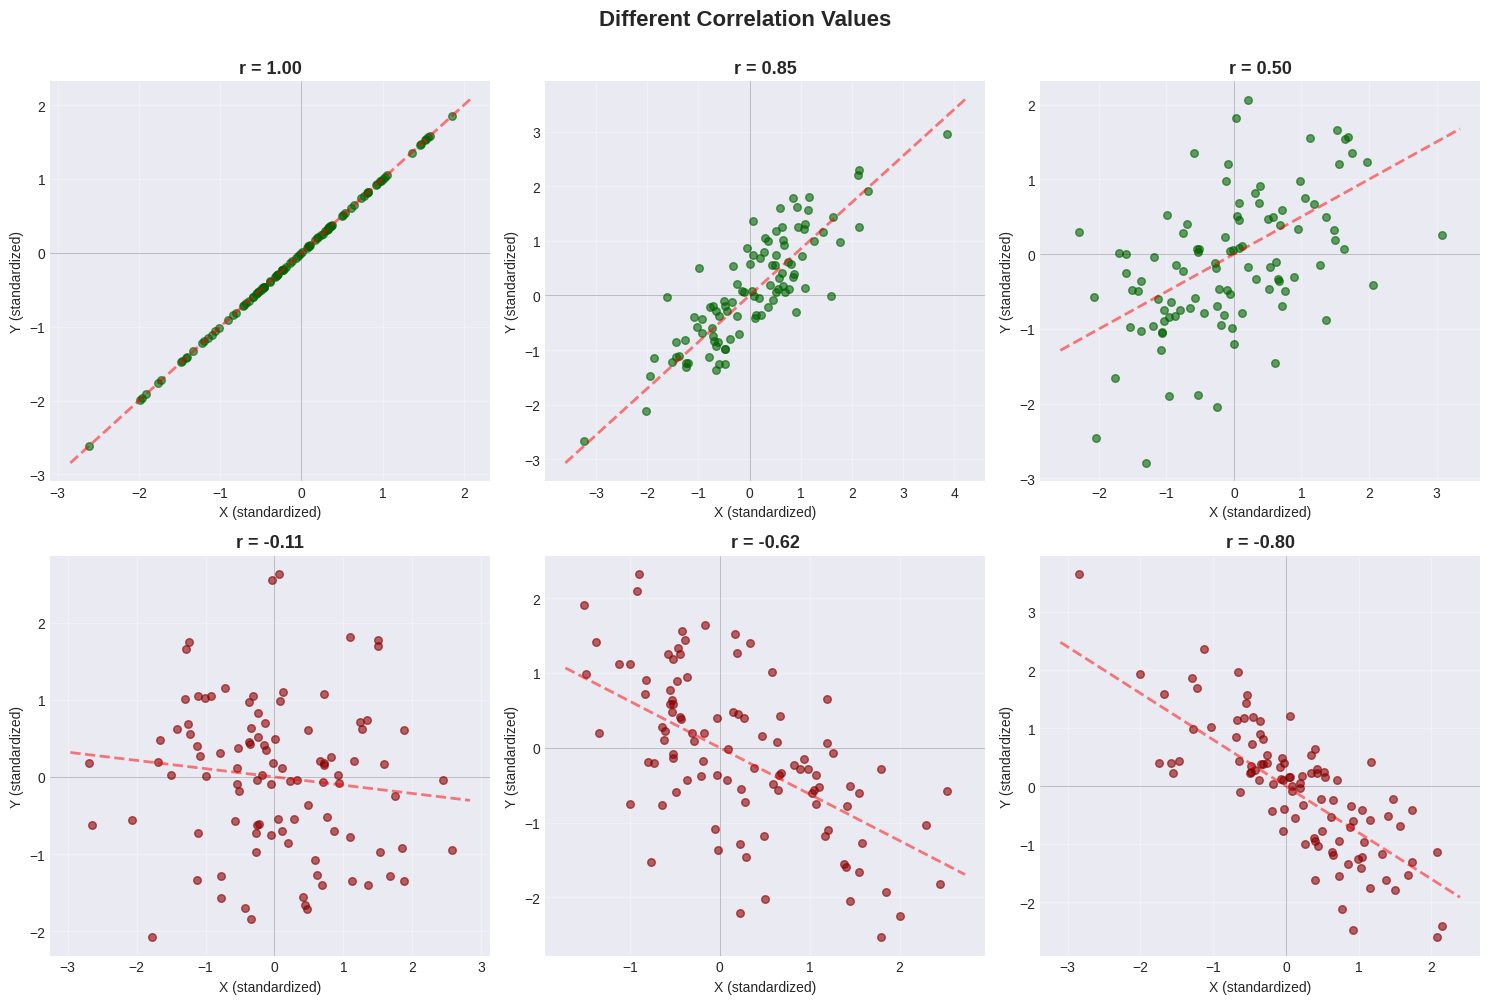

In [9]:
# Generate data with different correlations
def generate_correlated_data(r_target, n=100):
    """Generate data with specified correlation."""
    x = np.random.randn(n)
    y = r_target * x + np.sqrt(1 - r_target**2) * np.random.randn(n)
    return x, y

# Create grid of plots
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
correlations = [1.0, 0.8, 0.5, 0.0, -0.5, -0.8]

for idx, r_val in enumerate(correlations):
    row, col = idx // 3, idx % 3
    ax = axes[row, col]
    
    x, y = generate_correlated_data(r_val)
    r_actual = np.corrcoef(x, y)[0, 1]
    
    color = 'darkgreen' if r_actual > 0 else ('darkred' if r_actual < 0 else 'gray')
    
    ax.scatter(x, y, alpha=0.6, s=30, color=color)
    ax.set_title(f'r = {r_actual:.2f}', fontsize=13, fontweight='bold')
    ax.set_xlabel('X (standardized)')
    ax.set_ylabel('Y (standardized)')
    ax.grid(True, alpha=0.3)
    ax.axhline(y=0, color='black', linewidth=0.5, alpha=0.3)
    ax.axvline(x=0, color='black', linewidth=0.5, alpha=0.3)
    
    # Add best-fit line
    x_line = np.array([ax.get_xlim()[0], ax.get_xlim()[1]])
    ax.plot(x_line, r_actual * x_line, 'r--', linewidth=2, alpha=0.5)

plt.suptitle('Different Correlation Values', fontsize=16, fontweight='bold', y=1.00)
plt.tight_layout()
plt.show()

### Pattern Guide

| Correlation | Visual Pattern | Description |
|-------------|----------------|-------------|
| $r = +1.0$ | Perfect upward line | All points on the line |
| $r = +0.8$ | Tight upward cloud | Strong positive trend |
| $r = +0.5$ | Loose upward cloud | Moderate positive trend |
| $r = 0.0$ | Circular cloud | No linear relationship |
| $r = -0.5$ | Loose downward cloud | Moderate negative trend |
| $r = -0.8$ | Tight downward cloud | Strong negative trend |

## 2.2.3 Confusion Caused by Correlation

### ⚠️ Critical Warning: Correlation ≠ Causation!

**Just because two variables are correlated does NOT mean one causes the other!**

Three possible explanations for correlation:

1. **X causes Y**: Pressing accelerator → car speeds up
2. **Y causes X**: (Sometimes) Happiness → success
3. **Hidden variable Z causes both**: Temperature → ice cream sales AND drownings

### Example 1: Spurious Correlation - Ice Cream and Drowning

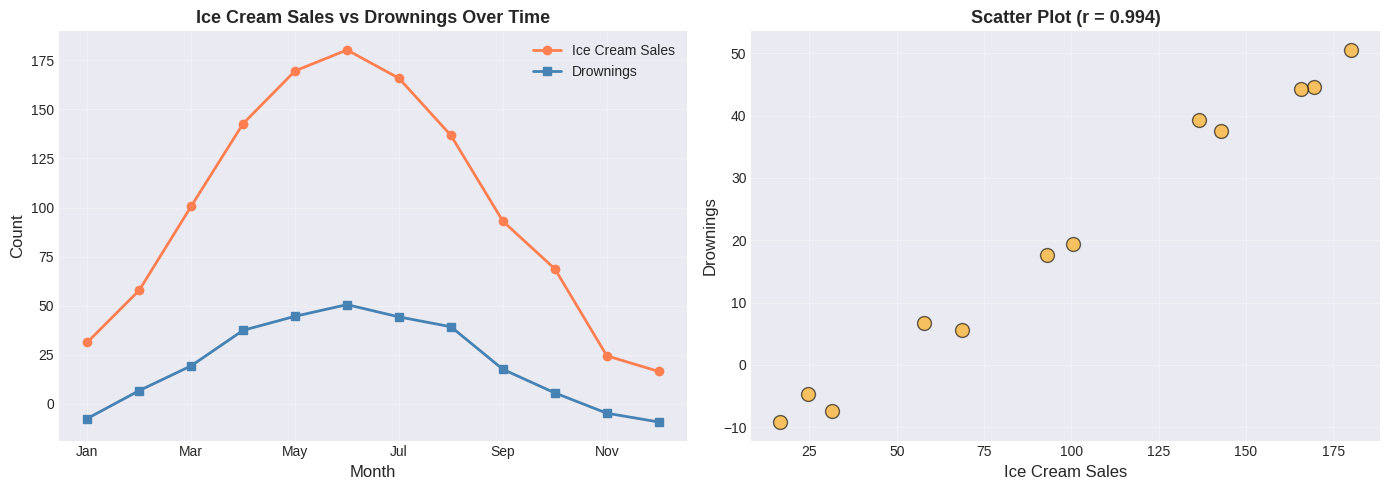

Correlation: r = 0.994


In [10]:
# Famous spurious correlation example
months = np.arange(1, 13)
summer_effect = np.sin((months - 3) * np.pi / 6)

ice_cream = 100 + 80 * summer_effect + np.random.normal(0, 5, 12)
drownings = 20 + 30 * summer_effect + np.random.normal(0, 2, 12)

r_spurious = np.corrcoef(ice_cream, drownings)[0, 1]

# Plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

month_names = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
ax1.plot(months, ice_cream, 'o-', linewidth=2, label='Ice Cream Sales', color='coral')
ax1.plot(months, drownings, 's-', linewidth=2, label='Drownings', color='steelblue')
ax1.set_xlabel('Month', fontsize=12)
ax1.set_ylabel('Count', fontsize=12)
ax1.set_title('Ice Cream Sales vs Drownings Over Time', fontsize=13, fontweight='bold')
ax1.set_xticks(months[::2])
ax1.set_xticklabels([month_names[i-1] for i in months[::2]])
ax1.legend()
ax1.grid(True, alpha=0.3)

ax2.scatter(ice_cream, drownings, s=100, alpha=0.6, color='orange', edgecolors='black')
ax2.set_xlabel('Ice Cream Sales', fontsize=12)
ax2.set_ylabel('Drownings', fontsize=12)
ax2.set_title(f'Scatter Plot (r = {r_spurious:.3f})', fontsize=13, fontweight='bold')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"Correlation: r = {r_spurious:.3f}")

### ⚠️ Spurious Correlation Alert!

**Does ice cream cause drowning? Of course not!**

The **real explanation** involves a **hidden variable**:

```
SUMMER (warm weather)
├── → More ice cream sales
└── → More swimming → More drownings
```

**Lesson:** Always think critically about WHY variables correlate!

**Questions to ask:**
1. Could X directly cause Y?
2. Could Y directly cause X?
3. Could a third variable cause BOTH?
4. Is this just coincidence?

### Example 2: Confounding Variable - Shoe Size and Reading Ability

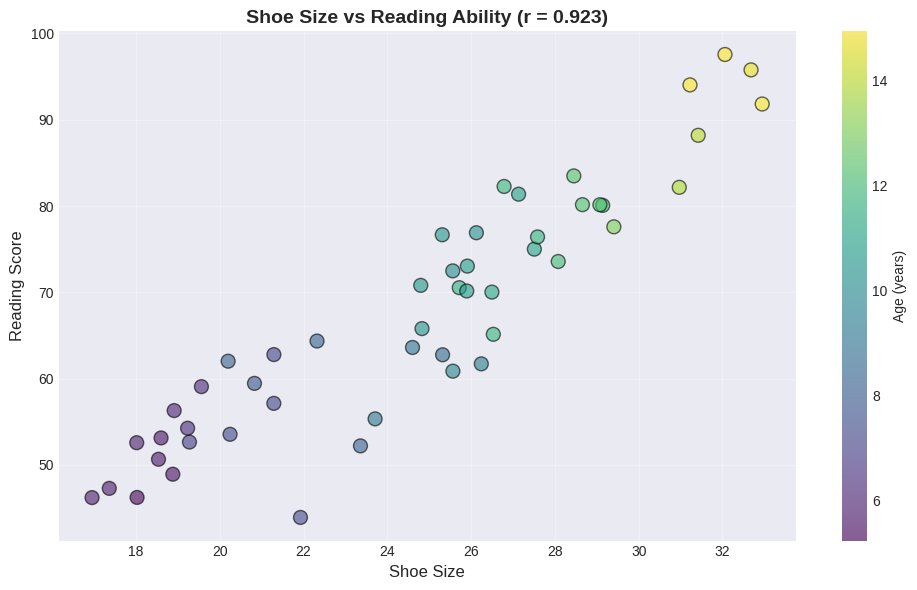

Correlation: r = 0.923


In [11]:
# Simulate children's data
n_children = 50
ages = np.random.uniform(5, 15, n_children)

# Both increase with age!
shoe_sizes = 10 + 1.5 * ages + np.random.normal(0, 1, n_children)
reading_scores = 20 + 5 * ages + np.random.normal(0, 5, n_children)

r_shoes_reading = np.corrcoef(shoe_sizes, reading_scores)[0, 1]

# Plot
plt.figure(figsize=(10, 6))
scatter = plt.scatter(shoe_sizes, reading_scores, c=ages, cmap='viridis', 
                     s=100, alpha=0.6, edgecolors='black')
plt.colorbar(scatter, label='Age (years)')
plt.xlabel('Shoe Size', fontsize=12)
plt.ylabel('Reading Score', fontsize=12)
plt.title(f'Shoe Size vs Reading Ability (r = {r_shoes_reading:.3f})', 
          fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print(f"Correlation: r = {r_shoes_reading:.3f}")

### The Confounding Variable: AGE

**Does having bigger feet make you read better? Obviously not!**

The hidden variable is **age**:
- Age → Bigger feet (physical growth)
- Age → Better reading (more practice)

Notice in the plot:
- Purple points (younger children) cluster in the bottom-left
- Yellow points (older children) cluster in the top-right

**Key insight:** If we control for age, the correlation between shoe size and reading ability disappears!

## 2.3 Real-World Case Study: Sterile Males in Wild Horse Herds

Let's apply everything we've learned to a real conservation problem!

### The Problem

**Question:** Do sterilized males reduce foal births in wild horse herds?

**Hypothesis:** More sterile males → fewer foals

**Data:** Observations over 3 years of:
- Number of adults
- Number of sterile males
- Number of foals

Let's see what the data shows!

In [2]:
# Wild horse herd data
days = np.array([0, 6, 39, 40, 66, 67, 335, 336, 360, 361, 374, 375, 404, 696, 700, 710, 738, 742, 772])
adults = np.array([62, 60, 58, 59, 56, 58, 47, 46, 44, 45, 42, 43, 40, 35, 34, 33, 32, 31, 30])
sterile = np.array([5, 5, 7, 7, 8, 8, 9, 9, 9, 9, 8, 9, 8, 7, 7, 6, 5, 5, 4])
foals = np.array([12, 11, 14, 13, 15, 14, 6, 6, 7, 6, 4, 3, 2, 3, 1, 2, 1, 1, 0])

# Create DataFrame
horse_data = pd.DataFrame({
    'Day': days, 'Adults': adults, 'Sterile_Males': sterile, 'Foals': foals
})

print("Wild Horse Herd Data:")
print(horse_data.head(10))
print(f"\nDataset: {len(days)} observations over {days[-1]} days (~2 years)")

Wild Horse Herd Data:
   Day  Adults  Sterile_Males  Foals
0    0      62              5     12
1    6      60              5     11
2   39      58              7     14
3   40      59              7     13
4   66      56              8     15
5   67      58              8     14
6  335      47              9      6
7  336      46              9      6
8  360      44              9      7
9  361      45              9      6

Dataset: 19 observations over 772 days (~2 years)


### First Analysis: Time Series Plot

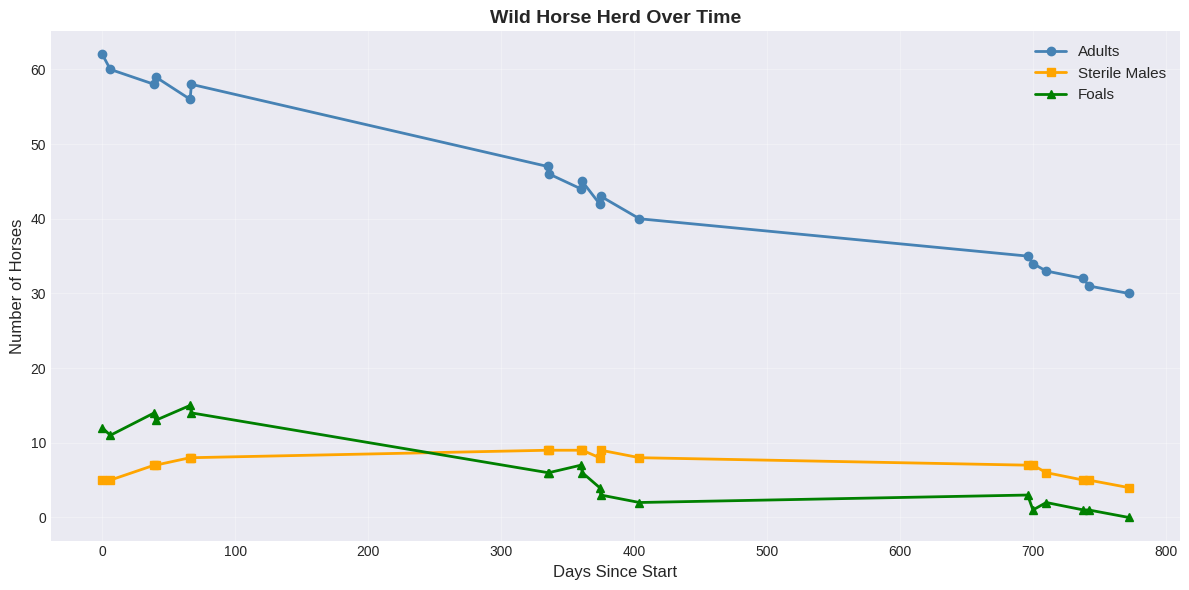

In [13]:
# Plot all variables over time
plt.figure(figsize=(12, 6))
plt.plot(days, adults, 'o-', linewidth=2, markersize=6, label='Adults', color='steelblue')
plt.plot(days, sterile, 's-', linewidth=2, markersize=6, label='Sterile Males', color='orange')
plt.plot(days, foals, '^-', linewidth=2, markersize=6, label='Foals', color='green')

plt.xlabel('Days Since Start', fontsize=12)
plt.ylabel('Number of Horses', fontsize=12)
plt.title('Wild Horse Herd Over Time', fontsize=14, fontweight='bold')
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

**Observation from time series:**
- ALL variables are DECREASING over time
- The herd is gradually shrinking
- Foals are decreasing as the herd shrinks

**Question:** Are sterile males actually reducing foal births?

### Second Analysis: Naive Correlation (WRONG!)

In [14]:
# Calculate naive correlations
r_sterile_foals = np.corrcoef(sterile, foals)[0, 1]
r_sterile_adults = np.corrcoef(sterile, adults)[0, 1]
r_adults_foals = np.corrcoef(adults, foals)[0, 1]

print("Naive Correlation Analysis:")
print(f"  Sterile Males vs Foals:  r = {r_sterile_foals:+.3f}")
print(f"  Sterile Males vs Adults: r = {r_sterile_adults:+.3f}")
print(f"  Adults vs Foals:         r = {r_adults_foals:+.3f}")

Naive Correlation Analysis:
  Sterile Males vs Foals:  r = +0.169
  Sterile Males vs Adults: r = +0.192
  Adults vs Foals:         r = +0.949


### 🤯 Surprising Result!

**More sterile males → MORE foals?** That makes no biological sense!

**More sterile males → MORE adults?** How is that possible?

Something is clearly wrong with this naive analysis...

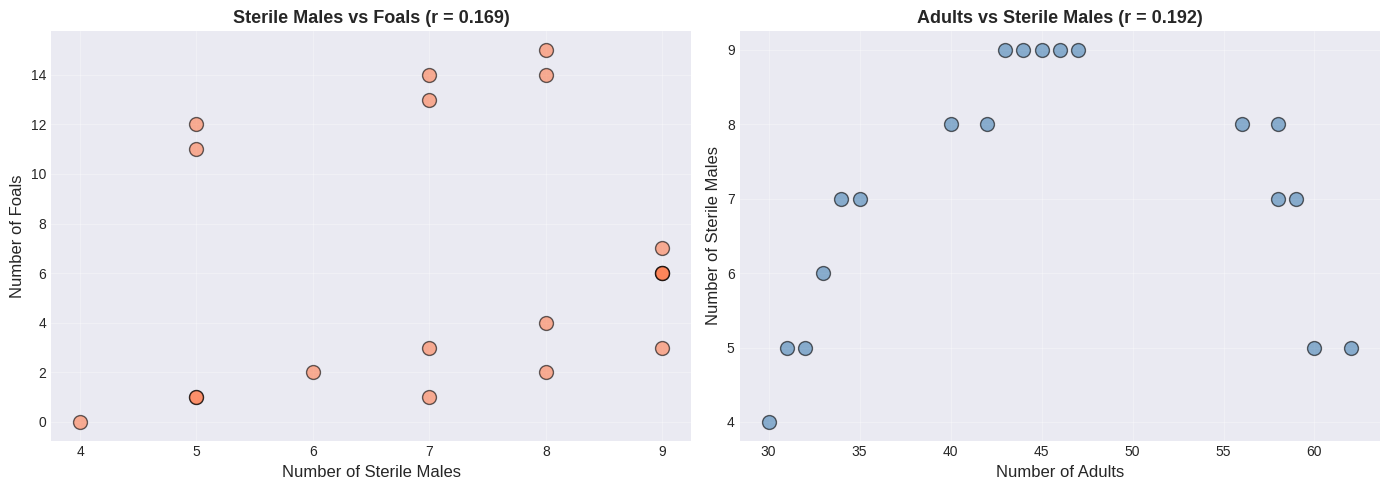

In [15]:
# Create scatter plots (naive analysis)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

ax1.scatter(sterile, foals, s=100, alpha=0.6, color='coral', edgecolors='black')
ax1.set_xlabel('Number of Sterile Males', fontsize=12)
ax1.set_ylabel('Number of Foals', fontsize=12)
ax1.set_title(f'Sterile Males vs Foals (r = {r_sterile_foals:.3f})', fontsize=13, fontweight='bold')
ax1.grid(True, alpha=0.3)

ax2.scatter(adults, sterile, s=100, alpha=0.6, color='steelblue', edgecolors='black')
ax2.set_xlabel('Number of Adults', fontsize=12)
ax2.set_ylabel('Number of Sterile Males', fontsize=12)
ax2.set_title(f'Adults vs Sterile Males (r = {r_sterile_adults:.3f})', fontsize=13, fontweight='bold')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### The Key Insight: Time as a Lurking Variable

Let's plot the scatter again, but **label points with the day number**:

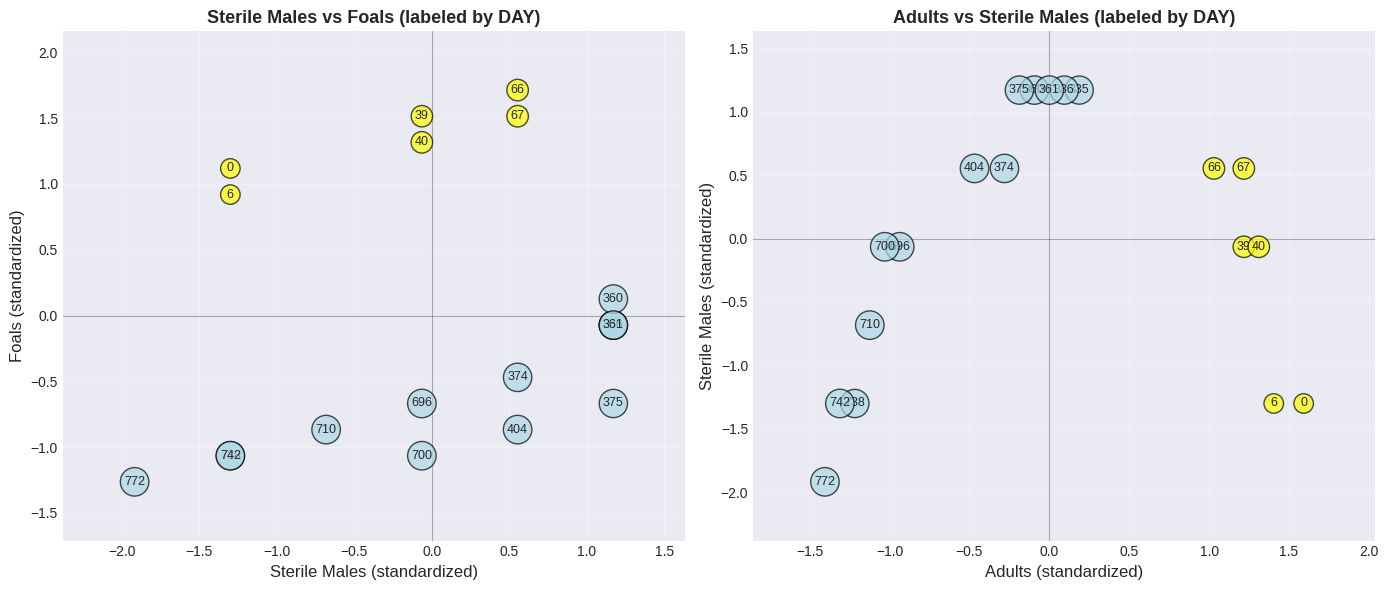

In [3]:
# Standardize for visualization
sterile_std = (sterile - np.mean(sterile)) / np.std(sterile)
foals_std = (foals - np.mean(foals)) / np.std(foals)
adults_std = (adults - np.mean(adults)) / np.std(adults)

# Create revealing scatter plots with day labels
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Plot invisible scatter first so axes auto-scale to the data range
ax1.scatter(sterile_std, foals_std, alpha=0)
for i in range(len(days)):
    color = 'yellow' if days[i] < 100 else 'lightblue'
    ax1.text(sterile_std[i], foals_std[i], str(days[i]), 
            ha='center', va='center', fontsize=9,
            bbox=dict(boxstyle='circle', facecolor=color, alpha=0.7))
ax1.set_xlabel('Sterile Males (standardized)', fontsize=12)
ax1.set_ylabel('Foals (standardized)', fontsize=12)
ax1.set_title('Sterile Males vs Foals (labeled by DAY)', fontsize=13, fontweight='bold')
ax1.grid(True, alpha=0.3)
ax1.axhline(y=0, color='black', linewidth=0.8, alpha=0.3)
ax1.axvline(x=0, color='black', linewidth=0.8, alpha=0.3)
ax1.margins(0.15)

# Plot invisible scatter first so axes auto-scale to the data range
ax2.scatter(adults_std, sterile_std, alpha=0)
for i in range(len(days)):
    color = 'yellow' if days[i] < 100 else 'lightblue'
    ax2.text(adults_std[i], sterile_std[i], str(days[i]),
            ha='center', va='center', fontsize=9,
            bbox=dict(boxstyle='circle', facecolor=color, alpha=0.7))
ax2.set_xlabel('Adults (standardized)', fontsize=12)
ax2.set_ylabel('Sterile Males (standardized)', fontsize=12)
ax2.set_title('Adults vs Sterile Males (labeled by DAY)', fontsize=13, fontweight='bold')
ax2.grid(True, alpha=0.3)
ax2.axhline(y=0, color='black', linewidth=0.8, alpha=0.3)
ax2.axvline(x=0, color='black', linewidth=0.8, alpha=0.3)
ax2.margins(0.15)

plt.tight_layout()
plt.show()

### 🔍 The Revelation!

Look at the day numbers in the plot:
- **Yellow (early days):** Upper right → many adults, many foals
- **Blue (later days):** Lower left → few adults, few foals

**The ENTIRE HERD is shrinking over time!**

The positive correlation exists because:
- When herd is **large** → more adults AND more sterile males AND more foals
- When herd is **small** → fewer of everything

⚠️ **The correlation is driven by TIME, not causation!**

### Correct Analysis: Correlation with Time

In [17]:
# Calculate correlations with TIME
r_adults_time = np.corrcoef(days, adults)[0, 1]
r_sterile_time = np.corrcoef(days, sterile)[0, 1]
r_foals_time = np.corrcoef(days, foals)[0, 1]

print("Correlation with TIME:")
print(f"  Adults vs Time:        r = {r_adults_time:.3f}")
print(f"  Sterile Males vs Time: r = {r_sterile_time:.3f}")
print(f"  Foals vs Time:         r = {r_foals_time:.3f}")

# Rate of decline calculation
time_std = np.std(days)
adults_std_val = np.std(adults)
foals_std_val = np.std(foals)

print(f"\nRate of decline (per {time_std:.0f} days):")
print(f"  Adults: {r_adults_time * adults_std_val:.1f} horses")
print(f"  Foals: {r_foals_time * foals_std_val:.1f} foals")

Correlation with TIME:
  Adults vs Time:        r = -0.988
  Sterile Males vs Time: r = -0.272
  Foals vs Time:         r = -0.928

Rate of decline (per 275 days):
  Adults: -10.6 horses
  Foals: -4.7 foals


### ✅ Conclusion

All correlations with time are **negative** - the herd is naturally declining.

The original positive correlation between sterile males and foals was **SPURIOUS** - caused by the lurking time variable!

**Key Lesson:** To understand a simple dataset, plot it MULTIPLE WAYS!
1. Plot each variable vs time
2. Create scatter plots
3. Calculate correlations
4. Think about confounding variables!

## More Correlation Examples

### Worked Example: Study Hours vs Test Errors

Expect negative correlation!

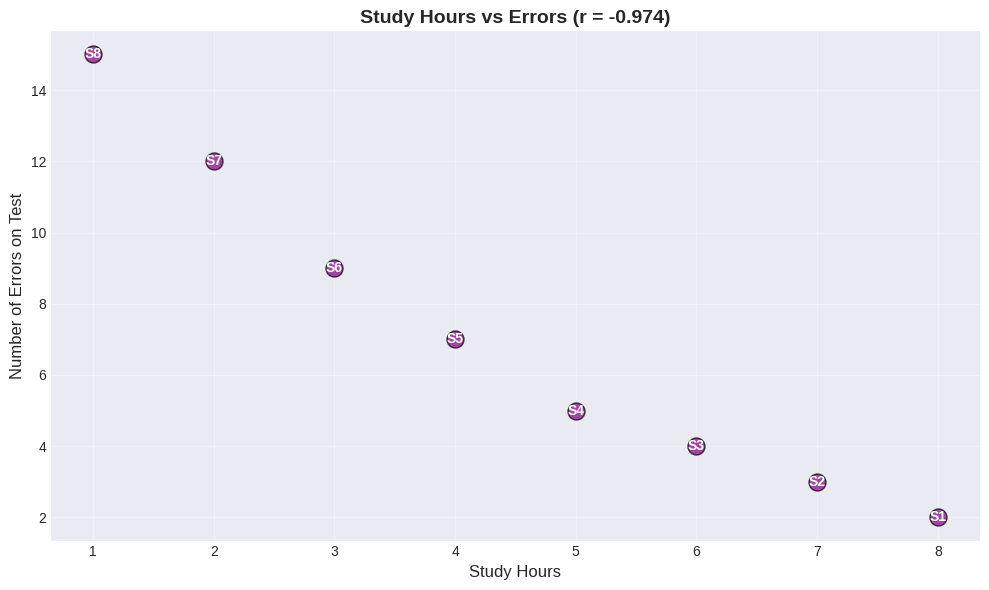

Correlation: r = -0.974 (Strong NEGATIVE)


In [18]:
study_hours = np.array([8, 7, 6, 5, 4, 3, 2, 1])
errors = np.array([2, 3, 4, 5, 7, 9, 12, 15])

r_study = np.corrcoef(study_hours, errors)[0, 1]

plt.figure(figsize=(10, 6))
plt.scatter(study_hours, errors, s=150, alpha=0.7, color='purple', edgecolors='black')

for i in range(len(study_hours)):
    plt.text(study_hours[i], errors[i], f'S{i+1}', ha='center', va='center', 
            fontweight='bold', color='white')

plt.xlabel('Study Hours', fontsize=12)
plt.ylabel('Number of Errors on Test', fontsize=12)
plt.title(f'Study Hours vs Errors (r = {r_study:.3f})', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print(f"Correlation: r = {r_study:.3f} (Strong NEGATIVE)")

**Interpretation:**
- More study → fewer errors
- Less study → more errors

This makes sense both intuitively AND statistically! This is an example where correlation likely reflects a causal relationship.

## Correlation Pitfalls

### Pitfall 1: Non-Linear Relationships

Correlation only measures **LINEAR** relationships!

Non-linear patterns can have low correlation despite strong relationships.

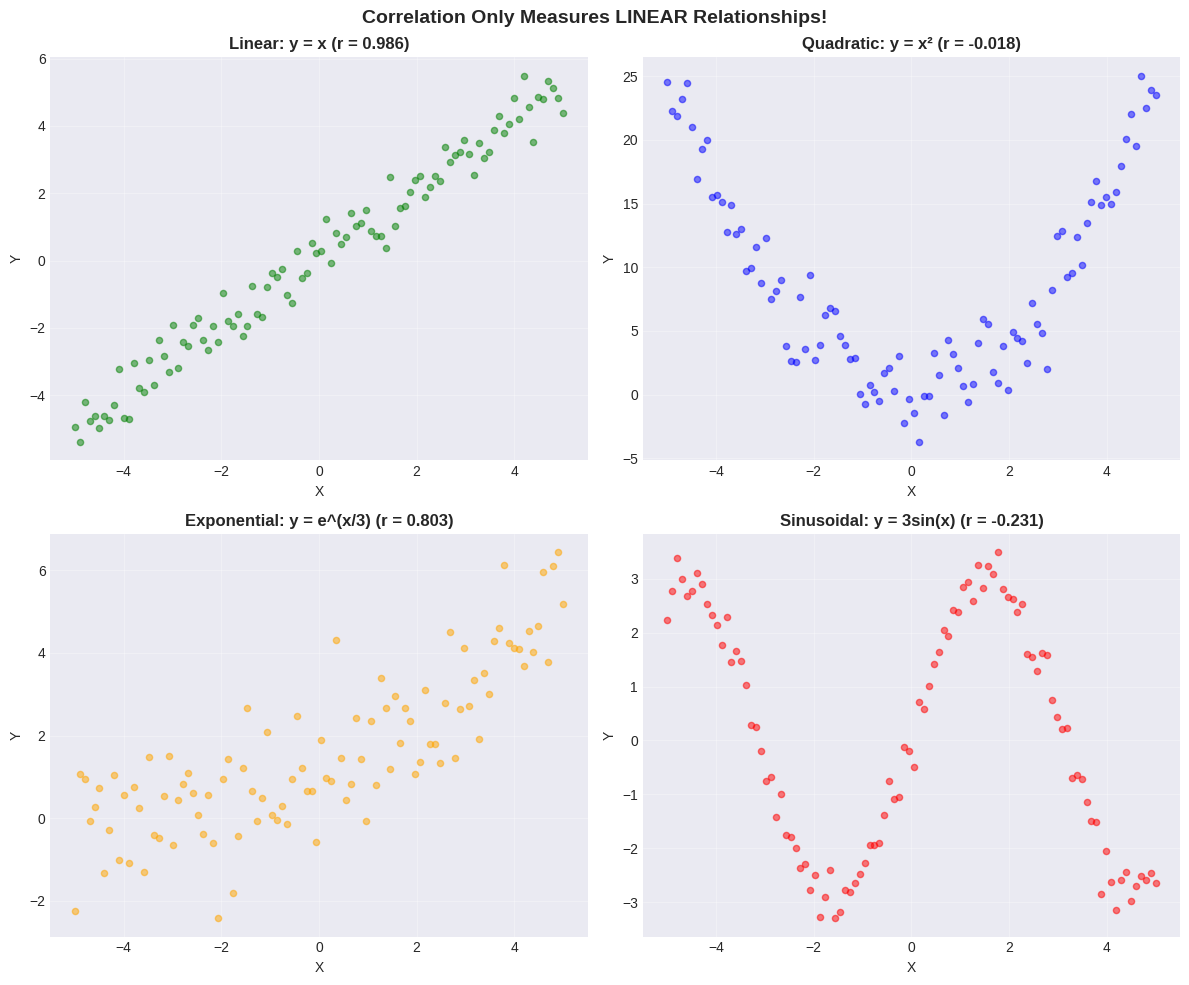

In [19]:
# Generate different relationship types
x_range = np.linspace(-5, 5, 100)

y_linear = x_range + np.random.normal(0, 0.5, 100)
y_quadratic = x_range**2 + np.random.normal(0, 2, 100)
y_exponential = np.exp(x_range/3) + np.random.normal(0, 1, 100)
y_sinusoidal = 3 * np.sin(x_range) + np.random.normal(0, 0.3, 100)

# Calculate correlations
r_linear = np.corrcoef(x_range, y_linear)[0, 1]
r_quadratic = np.corrcoef(x_range, y_quadratic)[0, 1]
r_exponential = np.corrcoef(x_range, y_exponential)[0, 1]
r_sinusoidal = np.corrcoef(x_range, y_sinusoidal)[0, 1]

# Plot
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

axes[0,0].scatter(x_range, y_linear, alpha=0.5, s=20, color='green')
axes[0,0].set_title(f'Linear: y = x (r = {r_linear:.3f})', fontsize=12, fontweight='bold')
axes[0,0].grid(True, alpha=0.3)

axes[0,1].scatter(x_range, y_quadratic, alpha=0.5, s=20, color='blue')
axes[0,1].set_title(f'Quadratic: y = x² (r = {r_quadratic:.3f})', fontsize=12, fontweight='bold')
axes[0,1].grid(True, alpha=0.3)

axes[1,0].scatter(x_range, y_exponential, alpha=0.5, s=20, color='orange')
axes[1,0].set_title(f'Exponential: y = e^(x/3) (r = {r_exponential:.3f})', fontsize=12, fontweight='bold')
axes[1,0].grid(True, alpha=0.3)

axes[1,1].scatter(x_range, y_sinusoidal, alpha=0.5, s=20, color='red')
axes[1,1].set_title(f'Sinusoidal: y = 3sin(x) (r = {r_sinusoidal:.3f})', fontsize=12, fontweight='bold')
axes[1,1].grid(True, alpha=0.3)

for ax in axes.flat:
    ax.set_xlabel('X')
    ax.set_ylabel('Y')

plt.suptitle('Correlation Only Measures LINEAR Relationships!', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

### ⚠️ Critical Lesson

**ALWAYS plot your data first!** Correlation can miss:
- **Quadratic relationships** (U-shaped) - perfect relationship but low $r$!
- **Exponential relationships** - $r$ can be misleading
- **Periodic relationships** - $r \approx 0$ despite clear pattern
- **Other non-linear patterns**

**Don't rely on correlation alone - USE SCATTER PLOTS!**

### Pitfall 2: Outliers

A single outlier can drastically change correlation!

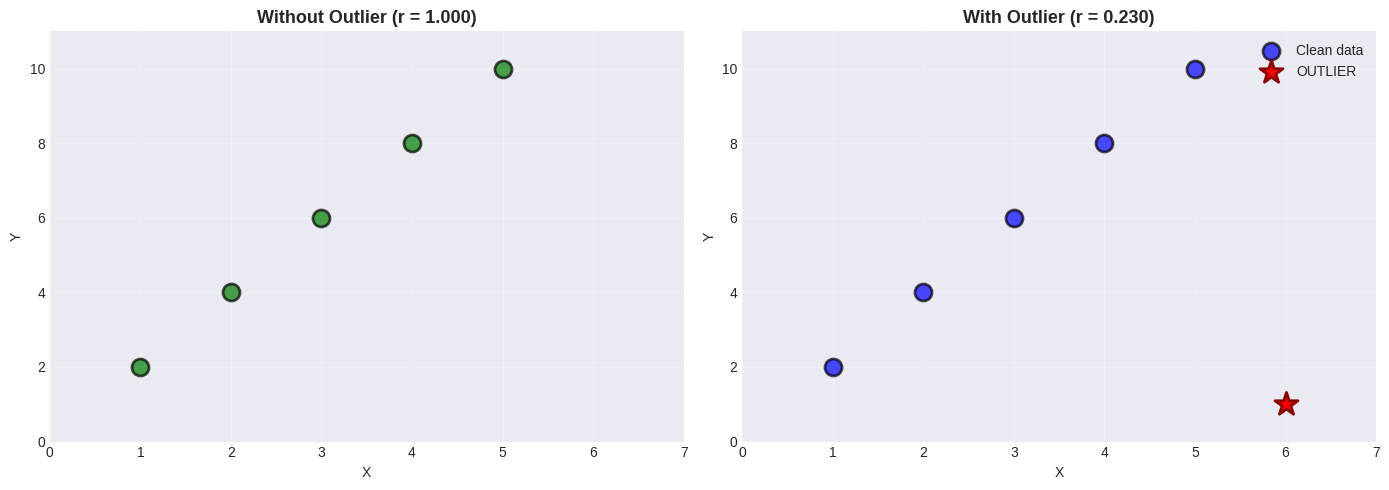

Original: r = 1.000 (perfect)
With outlier: r = 0.230
Change: 0.770 from just ONE point!


In [20]:
# Create clean data
x_clean = np.array([1, 2, 3, 4, 5])
y_clean = np.array([2, 4, 6, 8, 10])
r_clean = np.corrcoef(x_clean, y_clean)[0, 1]

# Add outlier
x_outlier = np.append(x_clean, 6)
y_outlier = np.append(y_clean, 1)
r_outlier = np.corrcoef(x_outlier, y_outlier)[0, 1]

# Visualize
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

ax1.scatter(x_clean, y_clean, s=150, color='green', alpha=0.7, edgecolors='black', linewidths=2)
ax1.set_title(f'Without Outlier (r = {r_clean:.3f})', fontsize=13, fontweight='bold')
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.grid(True, alpha=0.3)
ax1.set_xlim(0, 7)
ax1.set_ylim(0, 11)

ax2.scatter(x_clean, y_clean, s=150, color='blue', alpha=0.7, edgecolors='black', linewidths=2, label='Clean data')
ax2.scatter(x_outlier[-1], y_outlier[-1], s=300, color='red', marker='*', 
           edgecolors='darkred', linewidths=2, label='OUTLIER', zorder=5)
ax2.set_title(f'With Outlier (r = {r_outlier:.3f})', fontsize=13, fontweight='bold')
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.grid(True, alpha=0.3)
ax2.set_xlim(0, 7)
ax2.set_ylim(0, 11)
ax2.legend()

plt.tight_layout()
plt.show()

print(f"Original: r = {r_clean:.3f} (perfect)")
print(f"With outlier: r = {r_outlier:.3f}")
print(f"Change: {abs(r_clean - r_outlier):.3f} from just ONE point!")

### 🚨 Outlier Impact

A single outlier can drastically change correlation!

**Best practices:**
1. Always look at scatter plots
2. Compute correlation with/without outliers
3. Investigate why outliers exist
4. Consider robust methods (Spearman correlation)

### Pitfall 3: The Scaling Problem

Axis scaling can make relationships look stronger or weaker than they are!

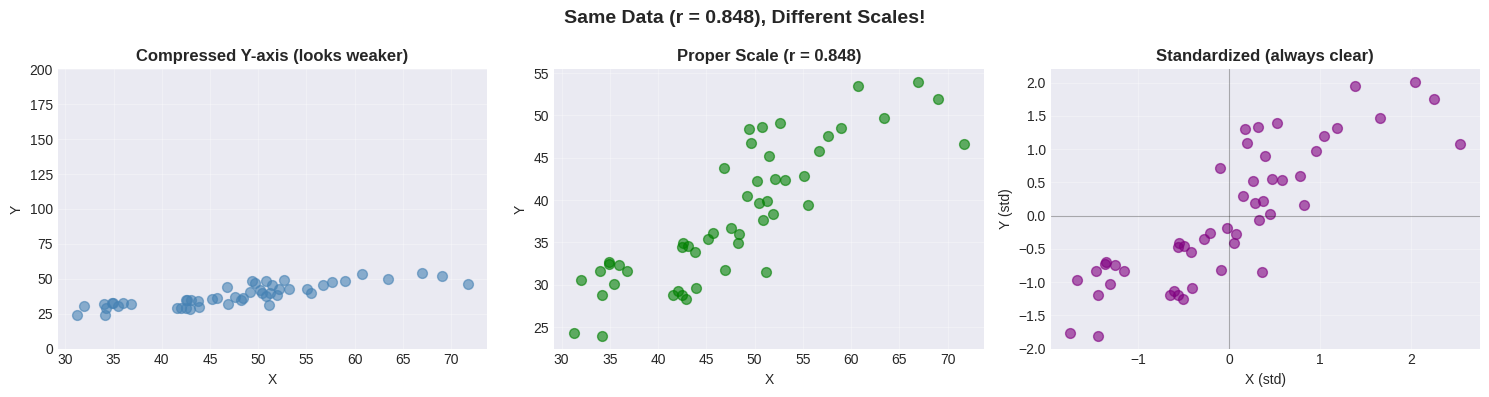

In [21]:
# Same data, different scales
x_demo = np.random.normal(50, 10, 50)
y_demo = 0.8 * x_demo + np.random.normal(0, 5, 50)
r_demo = np.corrcoef(x_demo, y_demo)[0, 1]

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 4))

# Compressed y-axis
ax1.scatter(x_demo, y_demo, alpha=0.6, s=50, color='steelblue')
ax1.set_ylim(0, 200)
ax1.set_title('Compressed Y-axis (looks weaker)', fontsize=12, fontweight='bold')
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.grid(True, alpha=0.3)

# Proper scale
ax2.scatter(x_demo, y_demo, alpha=0.6, s=50, color='green')
ax2.set_title(f'Proper Scale (r = {r_demo:.3f})', fontsize=12, fontweight='bold')
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.grid(True, alpha=0.3)

# Standardized
x_std_demo = (x_demo - np.mean(x_demo)) / np.std(x_demo)
y_std_demo = (y_demo - np.mean(y_demo)) / np.std(y_demo)
ax3.scatter(x_std_demo, y_std_demo, alpha=0.6, s=50, color='purple')
ax3.set_title('Standardized (always clear)', fontsize=12, fontweight='bold')
ax3.set_xlabel('X (std)')
ax3.set_ylabel('Y (std)')
ax3.grid(True, alpha=0.3)
ax3.axhline(y=0, color='black', linewidth=0.8, alpha=0.3)
ax3.axvline(x=0, color='black', linewidth=0.8, alpha=0.3)

plt.suptitle(f'Same Data (r = {r_demo:.3f}), Different Scales!', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

### 🚨 Scaling Matters!

The **same data** can look different with different axis scales.

**Solution:** Use standardized coordinates!
- Removes unit effects
- Centers at (0,0)
- Makes patterns crystal clear

## Correlation Matrix

For datasets with **multiple variables**, compute all pairwise correlations at once!

In [22]:
# Generate multi-variable dataset
np.random.seed(42)
n = 100

age = np.random.uniform(20, 60, n)
height = np.random.normal(170, 10, n)
weight = 0.6 * height + 0.1 * age + np.random.normal(0, 5, n)
shoe_size = 0.15 * height + np.random.normal(-10, 2, n)
income = 1000 * age + 500 * height + np.random.normal(0, 10000, n)

data_multi = pd.DataFrame({
    'Age': age, 'Height': height, 'Weight': weight, 
    'Shoe_Size': shoe_size, 'Income': income
})

# Correlation matrix
corr_matrix = data_multi.corr()
print("Correlation Matrix:")
print(corr_matrix.round(3))

# Find strongest correlations
mask = np.triu(np.ones_like(corr_matrix), k=1).astype(bool)
corr_values = corr_matrix.where(mask).stack()
corr_sorted = corr_values.abs().sort_values(ascending=False)

print("\nTop 5 Correlations:")
for i, (pair, val) in enumerate(corr_sorted.head(5).items(), 1):
    original_val = corr_matrix.loc[pair[0], pair[1]]
    print(f"  {i}. {pair[0]:10s} - {pair[1]:10s}: r = {original_val:+.3f}")

Correlation Matrix:
             Age  Height  Weight  Shoe_Size  Income
Age        1.000  -0.150   0.050     -0.062   0.661
Height    -0.150   1.000   0.678      0.673   0.259
Weight     0.050   0.678   1.000      0.411   0.258
Shoe_Size -0.062   0.673   0.411      1.000   0.255
Income     0.661   0.259   0.258      0.255   1.000

Top 5 Correlations:
  1. Height     - Weight    : r = +0.678
  2. Height     - Shoe_Size : r = +0.673
  3. Age        - Income    : r = +0.661
  4. Weight     - Shoe_Size : r = +0.411
  5. Height     - Income    : r = +0.259


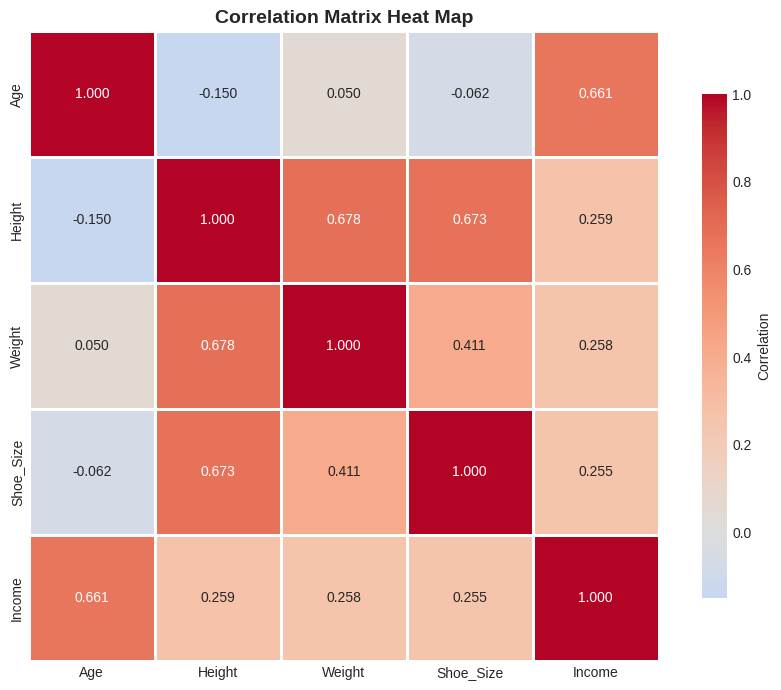

In [23]:
# Visualize as heatmap
plt.figure(figsize=(9, 7))
sns.heatmap(corr_matrix, annot=True, fmt='.3f', cmap='coolwarm', 
            center=0, square=True, linewidths=2,
            cbar_kws={"shrink": 0.8, "label": "Correlation"})
plt.title('Correlation Matrix Heat Map', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

### Reading Heat Maps

| Color | Meaning |
|-------|---------|
| 🔴 **Red** | Strong positive correlation |
| 🔵 **Blue** | Strong negative correlation |
| ⚪ **White** | No correlation |

Heat maps make it easy to spot patterns in multi-variable datasets at a glance!

## Alternative Correlation Measures

### Spearman's Rank Correlation

Uses **ranks** instead of values:
- Robust to outliers
- Works for monotonic (not necessarily linear) relationships
- Range still -1 to +1

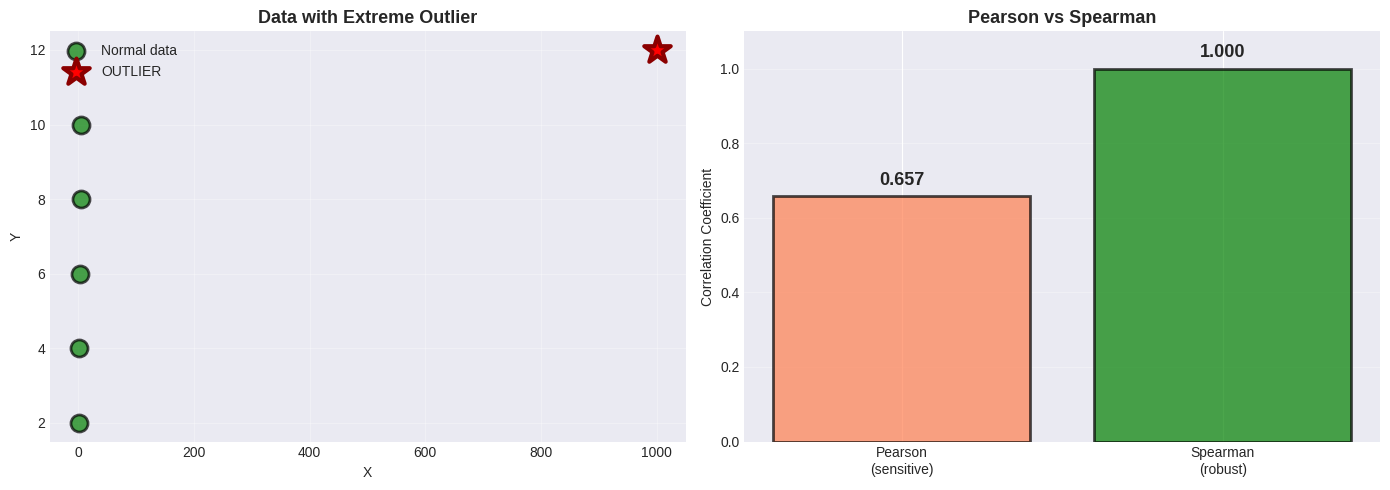

Pearson:  r = 0.657 (affected by outlier)
Spearman: ρ = 1.000 (robust!)


In [24]:
from scipy.stats import spearmanr

# Data with extreme outlier
x_extreme = np.array([1, 2, 3, 4, 5, 1000])  # Huge outlier!
y_extreme = np.array([2, 4, 6, 8, 10, 12])

r_pearson = stats.pearsonr(x_extreme, y_extreme)[0]
r_spearman = spearmanr(x_extreme, y_extreme)[0]

# Visualize
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

ax1.scatter(x_extreme[:-1], y_extreme[:-1], s=150, color='green', 
           alpha=0.7, edgecolors='black', linewidths=2, label='Normal data')
ax1.scatter(x_extreme[-1], y_extreme[-1], s=400, color='red', marker='*',
           edgecolors='darkred', linewidths=3, label='OUTLIER', zorder=5)
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_title('Data with Extreme Outlier', fontsize=13, fontweight='bold')
ax1.legend()
ax1.grid(True, alpha=0.3)

methods = ['Pearson\n(sensitive)', 'Spearman\n(robust)']
values = [r_pearson, r_spearman]
colors = ['coral' if v < 0.9 else 'green' for v in values]

bars = ax2.bar(methods, values, color=colors, alpha=0.7, edgecolor='black', linewidth=2)
ax2.set_ylabel('Correlation Coefficient')
ax2.set_title('Pearson vs Spearman', fontsize=13, fontweight='bold')
ax2.set_ylim(0, 1.1)
ax2.grid(axis='y', alpha=0.3)

for bar, val in zip(bars, values):
    ax2.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.03, 
            f'{val:.3f}', ha='center', fontsize=13, fontweight='bold')

plt.tight_layout()
plt.show()

print(f"Pearson:  r = {r_pearson:.3f} (affected by outlier)")
print(f"Spearman: ρ = {r_spearman:.3f} (robust!)")

### Why Spearman is Robust

Spearman uses **RANKS** instead of actual values:

```
x values:    [1,    2,    3,    4,    5,    1000]
x ranks:     [1,    2,    3,    4,    5,    6   ]
                                          ↑
                      Outlier becomes just "rank 6", not 1000!
```

Extreme values become just "highest rank" → outliers have less impact!

## 🎯 Summary: When to Use What

### Decision Tree

```
Does your data have outliers?
│
├── NO → Use Pearson correlation
│
└── YES → Is the relationship linear?
    │
    ├── YES, but with outliers → Use Spearman
    │
    └── NO, non-linear → Use Spearman or transform data
```

### Quick Reference Table

| Method | Best For | Robust to Outliers? | Measures |
|--------|----------|---------------------|----------|
| **Pearson** | Linear relationships | ❌ No | Linear correlation |
| **Spearman** | Monotonic relationships | ✔️ Yes | Rank correlation |
| **Kendall** | Small samples, many ties | ✔️ Yes | Concordance |

## 📝 Practice Problems

Work through these to master correlation!

### Problem 1: Weight and Adiposity

Given: $r = 0.9$, mean weight = 150 lb, $\sigma_{weight} = 30$ lb  
Adiposity: mean = 0.8, $\sigma_{adiposity} = 0.1$

**Tasks:**
1. Predict adiposity for weight = 170 lb
2. Predict weight for adiposity = 0.75
3. What is the RMSE of predictions?

### Problem 2: Income and IQ

Given: $r = 0.30$, mean income = \$60,000, $\sigma_{income} = \$20,000$  
IQ: mean = 100, $\sigma_{IQ} = 15$

**Tasks:**
1. Predict IQ for income = \$70,000
2. How reliable is this prediction?
3. If family income increases, does the child's IQ increase?

### Problem 3: Identify the Issue

For each scenario, identify why correlation might be misleading:

1. Hospital size (beds) vs mortality rate: r = +0.65
   - *Hint: Larger hospitals handle sicker patients*

2. Chocolate consumption per capita vs Nobel prizes per capita (by country): r = +0.79
   - *Hint: Think about wealth*

3. Number of firefighters vs fire damage: r = +0.80
   - *Hint: What determines both?*

## Solutions to Practice Problems

In [25]:
# PROBLEM 1: Weight and Adiposity
r = 0.9
weight_mean, weight_std = 150, 30
adip_mean, adip_std = 0.8, 0.1

# Task 1: Predict adiposity for 170 lb
weight_new = 170
adip_pred = adip_mean + r * (adip_std / weight_std) * (weight_new - weight_mean)

# Task 2: Predict weight for adiposity 0.75
adip_new = 0.75
weight_pred = weight_mean + r * (weight_std / adip_std) * (adip_new - adip_mean)

# Task 3: RMSE
rmse = weight_std * np.sqrt(1 - r**2)

print("PROBLEM 1 SOLUTIONS")
print(f"1. For weight = 170 lb: Predicted adiposity = {adip_pred:.3f}")
print(f"2. For adiposity = 0.75: Predicted weight = {weight_pred:.1f} lb")
print(f"3. RMSE = {rmse:.1f} lb, r² = {r**2:.2f} ({r**2*100:.0f}% variance explained)")

# PROBLEM 2: Income and IQ
r2 = 0.30
income_mean, income_std = 60000, 20000
iq_mean, iq_std = 100, 15

income_new = 70000
iq_pred = iq_mean + r2 * (iq_std / income_std) * (income_new - income_mean)
rmse2 = iq_std * np.sqrt(1 - r2**2)

print("\nPROBLEM 2 SOLUTIONS")
print(f"1. For income = $70,000: Predicted IQ = {iq_pred:.1f}")
print(f"2. RMSE = {rmse2:.1f} IQ points, r² = {r2**2:.2f} ({r2**2*100:.0f}% variance explained)")
print("3. Correlation ≠ causation! Giving money won't increase IQ.")

PROBLEM 1 SOLUTIONS
1. For weight = 170 lb: Predicted adiposity = 0.860
2. For adiposity = 0.75: Predicted weight = 136.5 lb
3. RMSE = 13.1 lb, r² = 0.81 (81% variance explained)

PROBLEM 2 SOLUTIONS
1. For income = $70,000: Predicted IQ = 102.2
2. RMSE = 14.3 IQ points, r² = 0.09 (9% variance explained)
3. Correlation ≠ causation! Giving money won't increase IQ.


### Problem 3 Solutions: Identify the Confound

| Scenario | Correlation | Confounding Variable |
|----------|-------------|---------------------|
| Hospital size vs mortality | r = +0.65 | **Patient severity** - larger hospitals treat sicker patients |
| Chocolate vs Nobel prizes | r = +0.79 | **National wealth** - affects both chocolate consumption and research funding |
| Firefighters vs damage | r = +0.80 | **Fire severity** - bigger fires need more firefighters AND cause more damage |

**Key Insight:** In each case, correlation exists but causation goes through a third variable!

## 🎯 Key Takeaways

### The Essential Rules

1. **Correlation measures LINEAR relationships**
   - Range: -1 to +1 (always!)
   - Sign indicates direction
   - Magnitude indicates strength

2. **Correlation enables prediction**
   - Formula: $\hat{y} = \bar{y} + r \cdot \frac{\sigma_y}{\sigma_x}(x - \bar{x})$
   - Rule of thumb: 1 std dev in x → r std devs in y
   - Accuracy: RMSE = $\sigma_y\sqrt{1-r^2}$

3. **CORRELATION ≠ CAUSATION** (never forget!)
   - Three possible explanations:
     1. X causes Y
     2. Y causes X
     3. Hidden variable Z causes both

4. **Always visualize first!**
   - Scatter plots reveal patterns
   - Correlation is just a number
   - Non-linear patterns need different methods

5. **Watch for confounding variables**
   - Time is often a lurking variable
   - Both variables might be caused by a third
   - Control for confounds in analysis

### Common Mistakes to Avoid

❌ Assuming high correlation means causation
❌ Using correlation for non-linear relationships
❌ Ignoring outliers
❌ Not plotting data first
❌ Forgetting about confounding variables
❌ Using inappropriate axis scales

✅ Always plot first (scatter plots!)
✅ Check for outliers
✅ Standardize when comparing
✅ Consider Spearman for robustness
✅ Think critically about WHY variables correlate
✅ Report both r and p-value